In [1]:
pip install scanpy -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install igraph -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install louvain -q

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas -q

Note: you may need to restart the kernel to use updated packages.


In [5]:
import scanpy as sc
import pandas as pd

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
adata = sc.read_h5ad('AnnDataObject.h5ad')

In [8]:
mask = adata.obs['sample'] == 'control'
adata = adata[mask, :]

# Quality Control

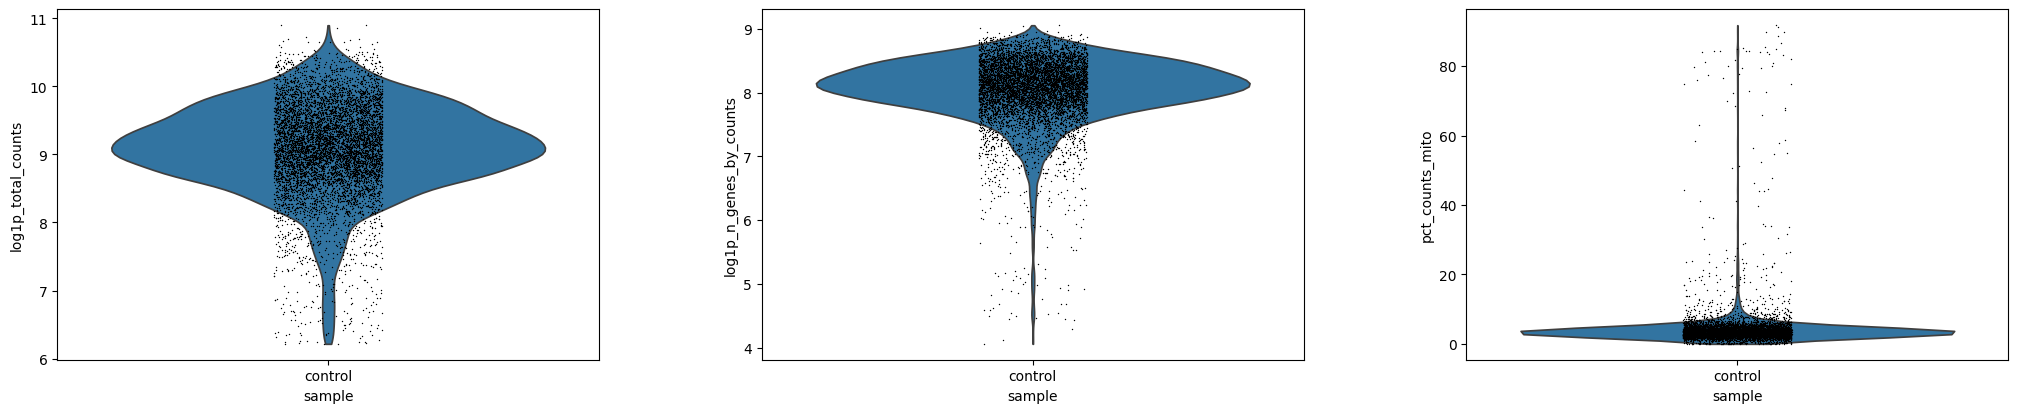

In [9]:
# Violin - genotype - log
sc.pl.violin(
  adata,
  keys=['log1p_total_counts', 'log1p_n_genes_by_counts', 'pct_counts_mito'],
  groupby='sample',
  save='-genotype-log.png'
)

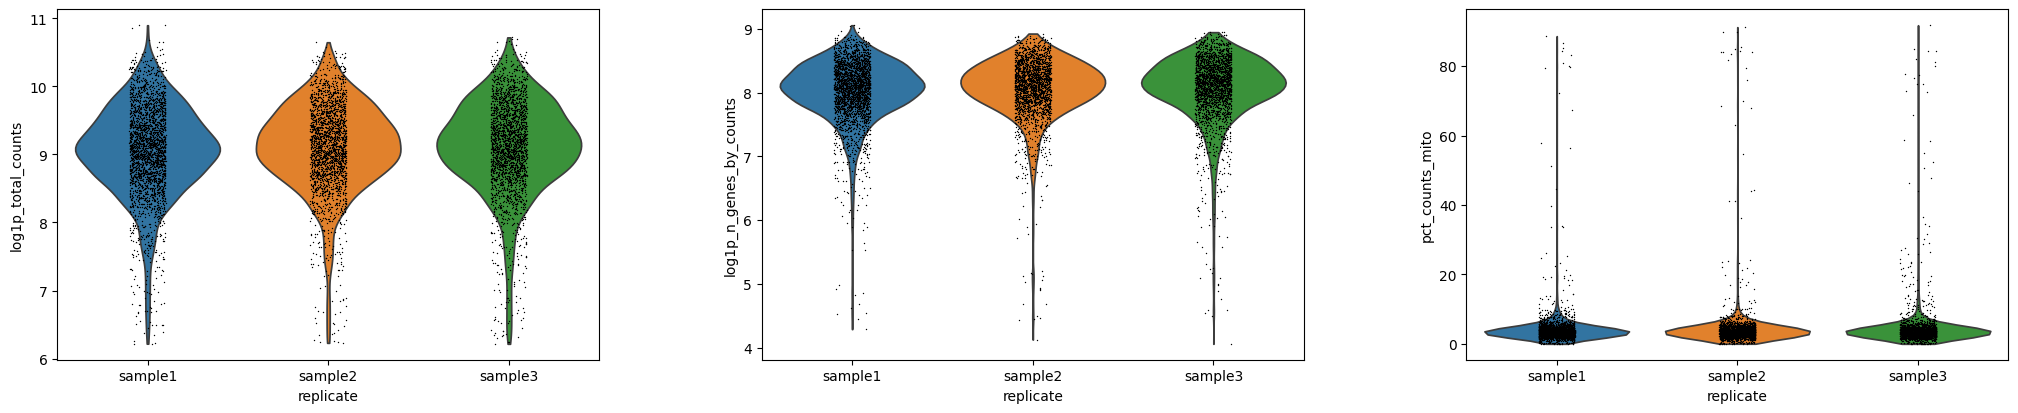

In [10]:
# Violin - sex - log
sc.pl.violin(
  adata,
  keys=['log1p_total_counts', 'log1p_n_genes_by_counts', 'pct_counts_mito'],
  groupby='replicate',
  save='-sex-log.png'
)

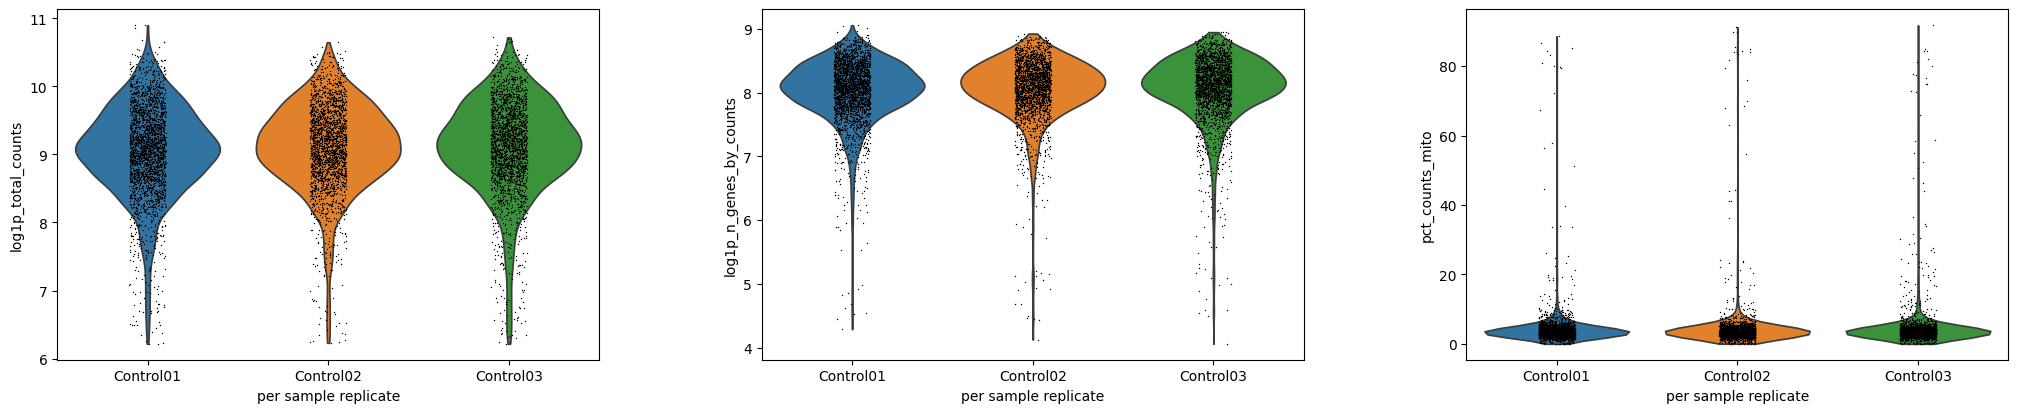

In [11]:
# Violin - sex - log
sc.pl.violin(
  adata,
  keys=['log1p_total_counts', 'log1p_n_genes_by_counts', 'pct_counts_mito'],
  groupby='per_sample_replicate',
  save='-sex-log.png'
)

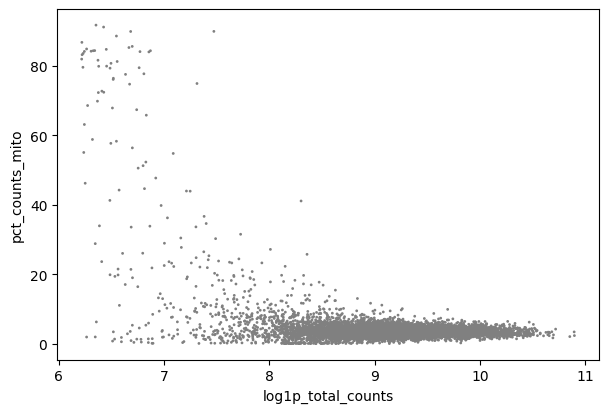

In [12]:
# Scatter - mito x UMIs
sc.pl.scatter(
  adata,
  x='log1p_total_counts',
  y='pct_counts_mito',
  save='-mitoxUMIs.png'
)

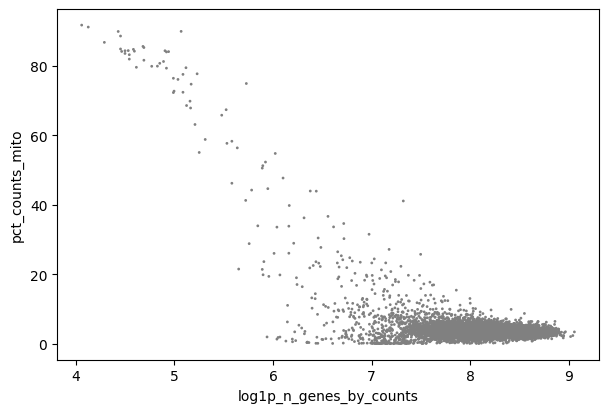

In [13]:
# Scatter - mito x genes
sc.pl.scatter(
  adata,
  x='log1p_n_genes_by_counts',
  y='pct_counts_mito',
  save='-mitoxgenes.png'
)

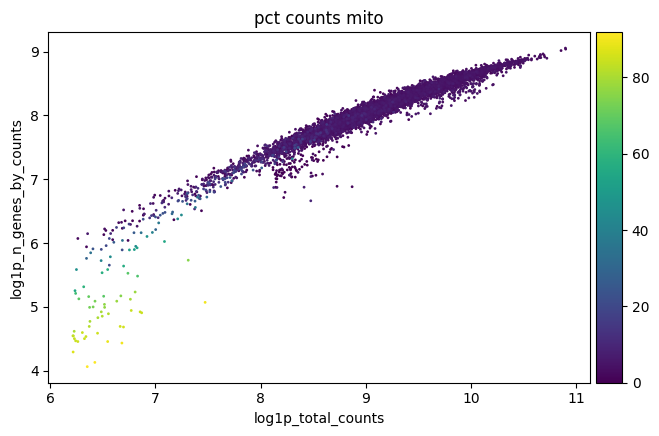

In [14]:
# Scatter - genes x UMIs
sc.pl.scatter(
  adata,
  x='log1p_total_counts',
  y='log1p_n_genes_by_counts',
  color='pct_counts_mito',
  save='-genesxUMIs.png'
)

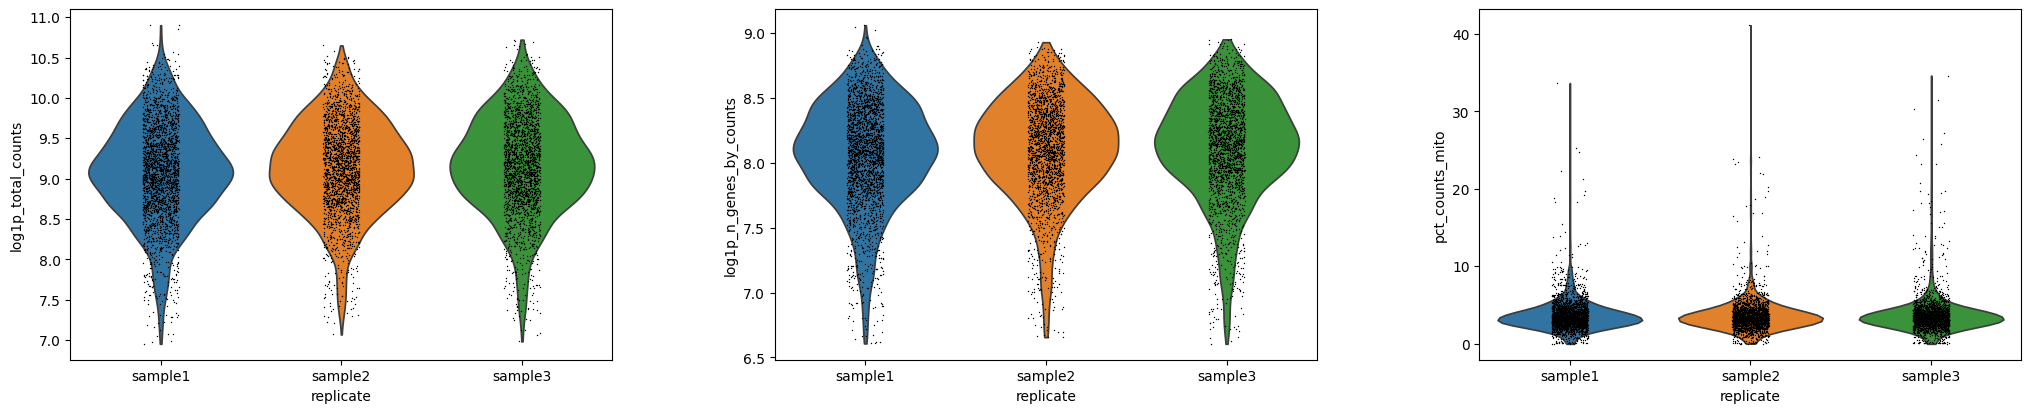

In [15]:
genes_filtered_obj = adata[adata.obs['log1p_n_genes_by_counts'] >= 6.6]
#genes_filtered_obj = genes_filtered_obj[genes_filtered_obj.obs['log1p_n_genes_by_counts'] <= 20.0]

# Violin - Filterbygenes
sc.pl.violin(
  genes_filtered_obj,
  keys=['log1p_total_counts', 'log1p_n_genes_by_counts', 'pct_counts_mito'],
  groupby='replicate',
  save='-Filterbygenes.png'
)

In [16]:
# 17051 × 36601
print(genes_filtered_obj)

View of AnnData object with n_obs × n_vars = 7403 × 36601
    obs: 'batch', 'sample', 'replicate', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'n_genes', 'pct_counts_in_top_50_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'per_sample_replicate'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'n_cells', 'mito'
    uns: 'sample_colors', 'replicate_colors', 'per_sample_replicate_colors'


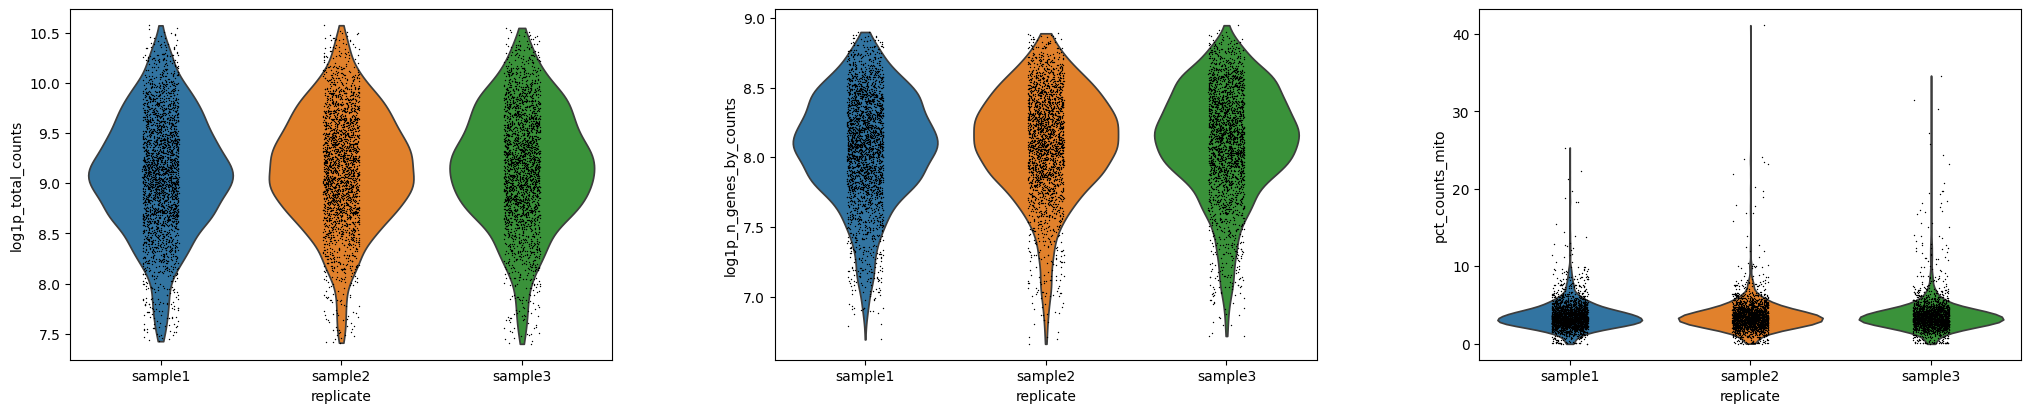

In [17]:
counts_filtered_obj = genes_filtered_obj[genes_filtered_obj.obs['log1p_total_counts'] >=  7.4]
counts_filtered_obj = counts_filtered_obj[counts_filtered_obj.obs['log1p_total_counts'] <= 10.6]

# Violin - Filterbycounts
sc.pl.violin(
  counts_filtered_obj,
  keys=['log1p_total_counts', 'log1p_n_genes_by_counts', 'pct_counts_mito'],
  groupby='replicate',
  save='-Filterbycounts.png'
)

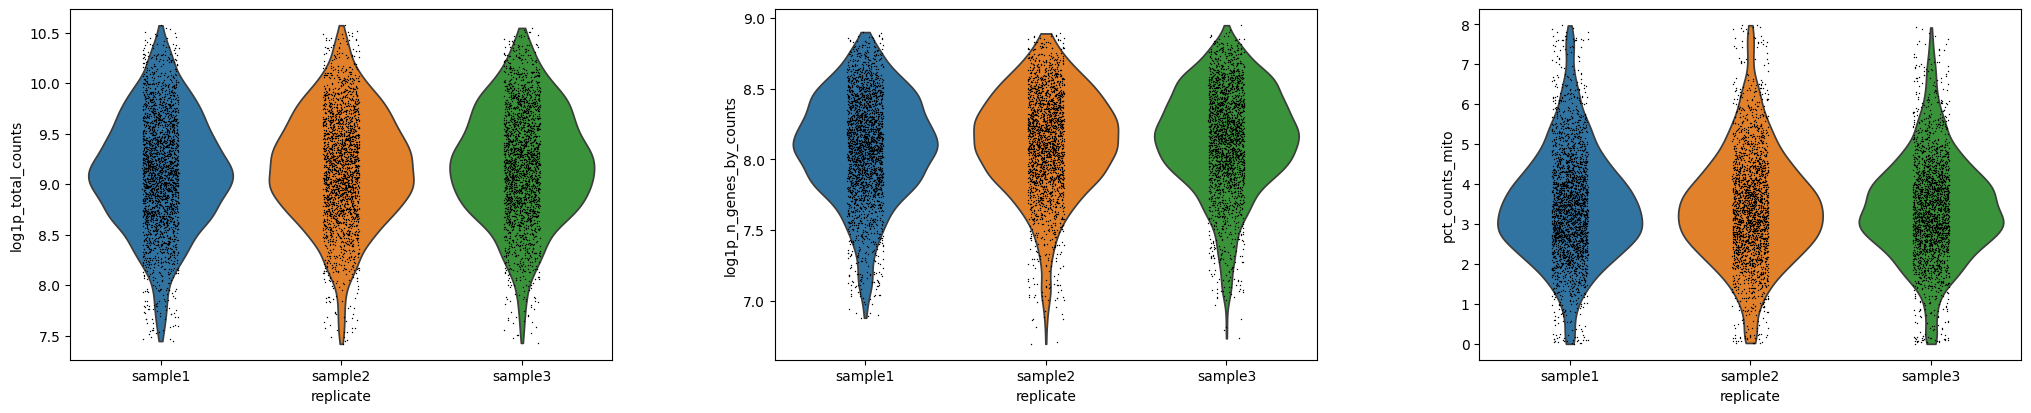

In [18]:
mito_filtered_obj = counts_filtered_obj[counts_filtered_obj.obs['pct_counts_mito'] >=  0]
mito_filtered_obj = mito_filtered_obj[mito_filtered_obj.obs['pct_counts_mito'] <= 8]

# Violin - Filterbymito
sc.pl.violin(
  mito_filtered_obj,
  keys=['log1p_total_counts', 'log1p_n_genes_by_counts', 'pct_counts_mito'],
  groupby='replicate',
  save='-Filterbymito.png'
)

In [19]:
filtered_obj = genes_filtered_obj.copy()

sc.pp.filter_genes(filtered_obj, min_cells=3)
sc.pp.filter_genes(filtered_obj, max_cells=1000000000)

#16803 × 36601
print(filtered_obj)

AnnData object with n_obs × n_vars = 7403 × 25819
    obs: 'batch', 'sample', 'replicate', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'n_genes', 'pct_counts_in_top_50_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'per_sample_replicate'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'n_cells', 'mito'
    uns: 'sample_colors', 'replicate_colors', 'per_sample_replicate_colors'


# Normalise Data

In [20]:
output_h5ad = filtered_obj.copy()
sc.pp.normalize_total(output_h5ad)

In [21]:
output_h5ad = sc.pp.log1p(output_h5ad, copy=True)  # below function requires log scaled data
sc.pp.highly_variable_genes(output_h5ad)

# Clustering - PCA Components

In [22]:
scaled_data = sc.pp.scale(output_h5ad, max_value=10.0, copy=True)

In [23]:
pca_components = sc.tl.pca(scaled_data, n_comps=50, copy=True)

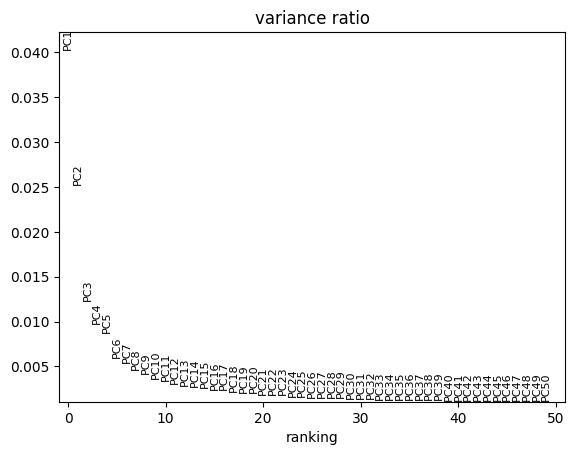

In [24]:
sc.pl.pca_variance_ratio(pca_components, n_pcs=50, save='-variance-ratio.png')

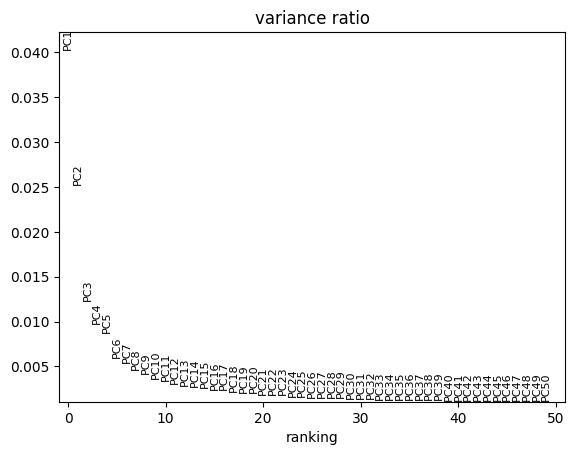

In [25]:
sc.pl.pca_variance_ratio(pca_components, n_pcs=50, save='-variance-ratio.png')

In [26]:
neighbours = sc.pp.neighbors(pca_components, n_neighbors=15, use_rep='X_pca', n_pcs=25, copy=True)

2025-03-02 19:29:51.091448: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-02 19:29:51.107578: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-02 19:29:51.107595: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-02 19:29:51.107607: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-02 19:29:51.110938: I tensorflow/core/platform/cpu_feature_g

In [27]:
tsne_components = sc.tl.tsne(neighbours, use_rep='X_pca', perplexity=30, copy=True)

In [28]:
umap_components = sc.tl.umap(tsne_components, copy=True)

# Find Clusters

In [29]:
# Find Clusters
clusters = sc.tl.louvain(umap_components, resolution=0.6, copy=True)

In [30]:
markers_cluster = sc.tl.rank_genes_groups(clusters, groupby="louvain", method='t-test_overestim_var', n_genes=50, copy=True)

In [31]:
markers_genotype = sc.tl.rank_genes_groups(markers_cluster, groupby="sample", method='t-test_overestim_var', n_genes=50, copy=True)

In [32]:
def generate_marker_table(adata):
    # extract marker table metadata
    res = adata.uns['rank_genes_groups']

    # generate DataFrame from metadata
    res_df = pd.DataFrame({
                "genes": pd.DataFrame(res["names"]).stack(),
                "scores": pd.DataFrame(res["scores"]).stack(),
                "logfoldchanges": pd.DataFrame(res["logfoldchanges"]).stack(),
                "pvals": pd.DataFrame(res["pvals"]).stack(),
                "pvals_adj": pd.DataFrame(res["pvals_adj"]).stack(),
            })

    # convert row names to columns
    res_df.index.name = 'newhead'
    res_df.reset_index(inplace=True)

    # rename generic column names
    res_df = res_df.rename(columns={'level_0': 'rank', 'level_1':'cluster'})

    # reorder columns
    res_df = res_df.reindex(columns=['cluster', 'rank', 'genes', 'scores', 'logfoldchanges', 'pvals', 'pvals_adj'])

    # insert ref column
    res_df.insert(2, 'ref', 'rest')

    return res_df

In [33]:
# Generate marker tables
cluster_marker_table = generate_marker_table(markers_cluster)
genotype_marker_table = generate_marker_table(markers_genotype)

display(cluster_marker_table.head(4))
display(genotype_marker_table.head(4))

cluster  rank   ref   genes     scores  logfoldchanges          pvals  \
0       0     0  rest  KCNMA1  30.460016             NaN  5.452858e-182   
1       1     0  rest   ALCAM  26.342333             NaN  1.130034e-139   
2       2     0  rest  DIAPH3  56.114864             NaN   0.000000e+00   
3       3     0  rest   RPL29  21.706341             NaN   3.585623e-95   

       pvals_adj  
0  1.407874e-177  
1  2.917635e-135  
2   0.000000e+00  
3   9.257720e-91

cluster  rank   ref       genes  scores  logfoldchanges  pvals  pvals_adj
0  control     0  rest  AC007325.4     0.0             NaN    1.0        1.0
1  control     1  rest  AL157371.2     0.0             NaN    1.0        1.0
2  control     2  rest        XPO5     0.0             NaN    1.0        1.0
3  control     3  rest        POLH     0.0             NaN    1.0        1.0

## Number of cells per cluster

In [55]:
clusters.obs['louvain'].value_counts()

0    1857
1    1836
2    1402
3    1211
4     741
5     356
Name: louvain, dtype: int64

# Differential Gene Expression Analysis

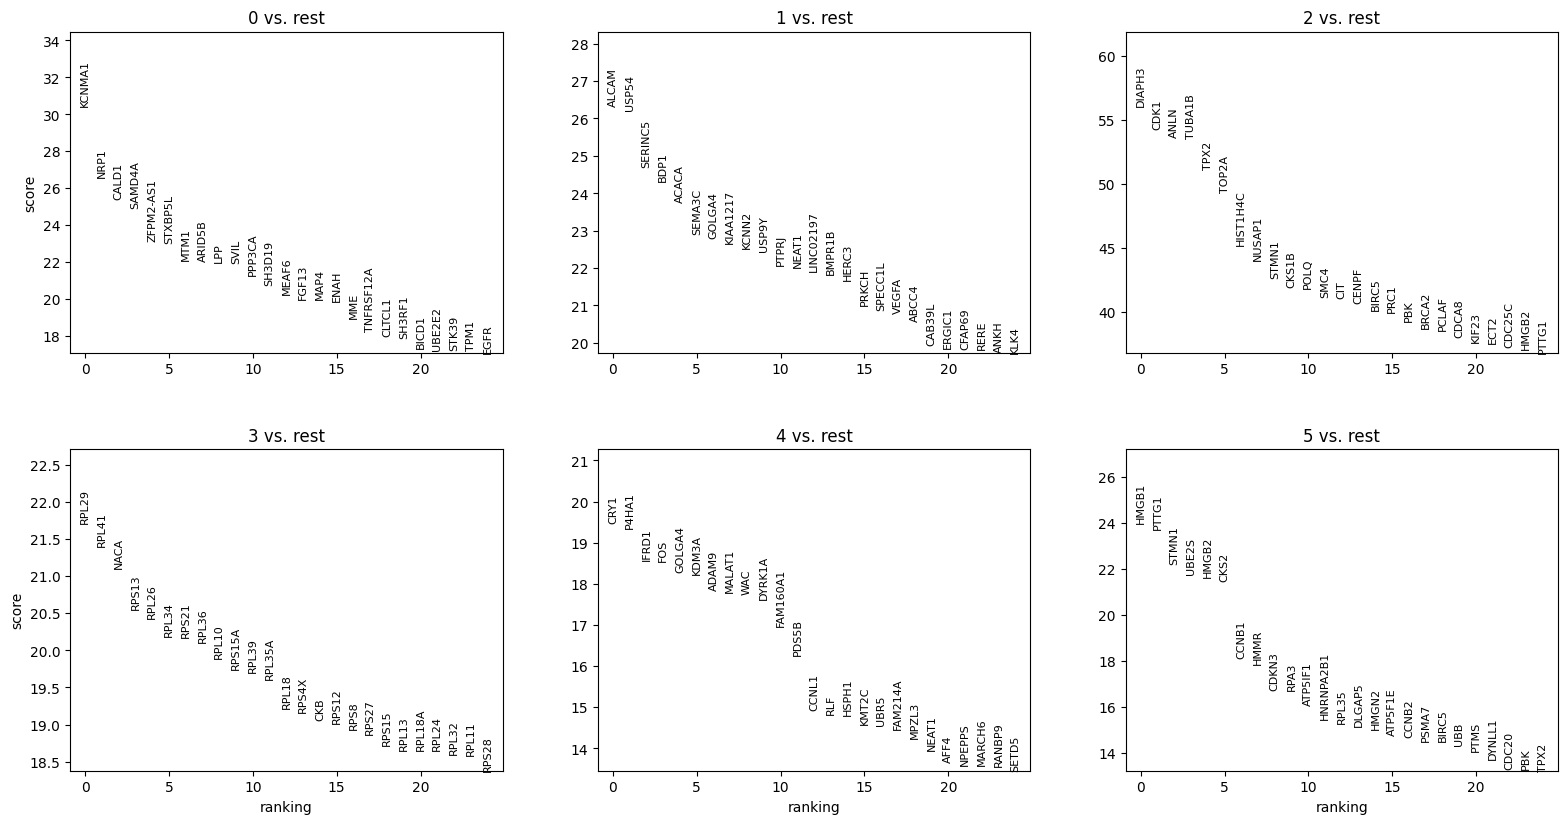

In [34]:
sc.tl.rank_genes_groups(clusters, groupby="louvain", method='t-test_overestim_var', key_added = "t-test_ov")
sc.pl.rank_genes_groups(clusters, n_genes=25, sharey=False, key = "t-test_ov", ncols=3, save="_t-test_ov_control.png")

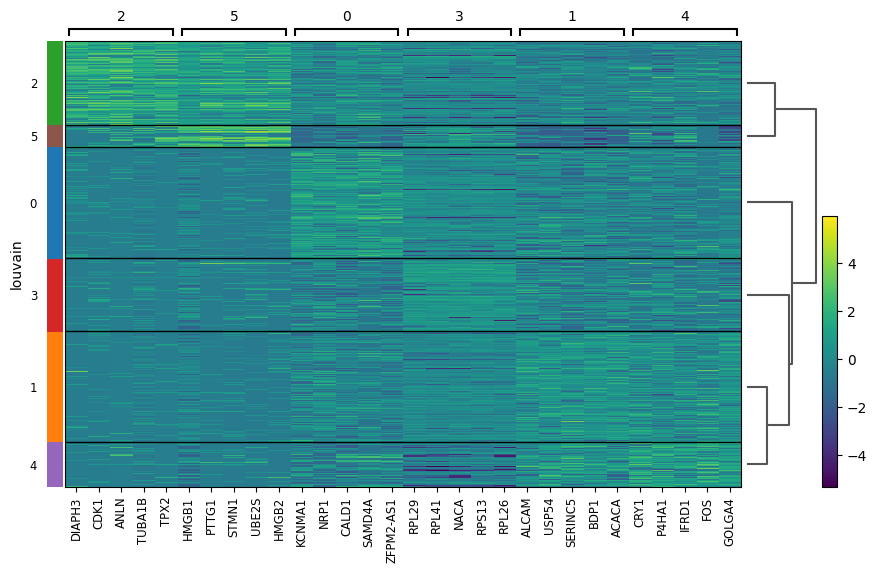

In [35]:
sc.pl.rank_genes_groups_heatmap(clusters, n_genes=5, key="t-test_ov", groupby="louvain", show_gene_labels=True, save="control.png")

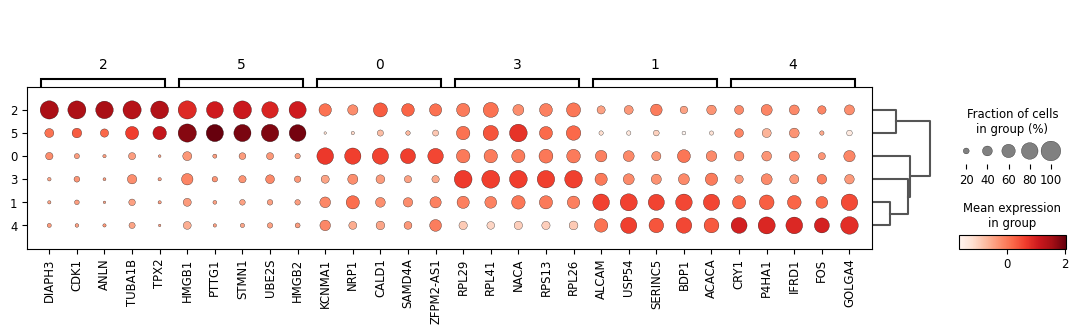

In [36]:
sc.pl.rank_genes_groups_dotplot(clusters, n_genes=5, key="t-test_ov", groupby="louvain", save="control.png")

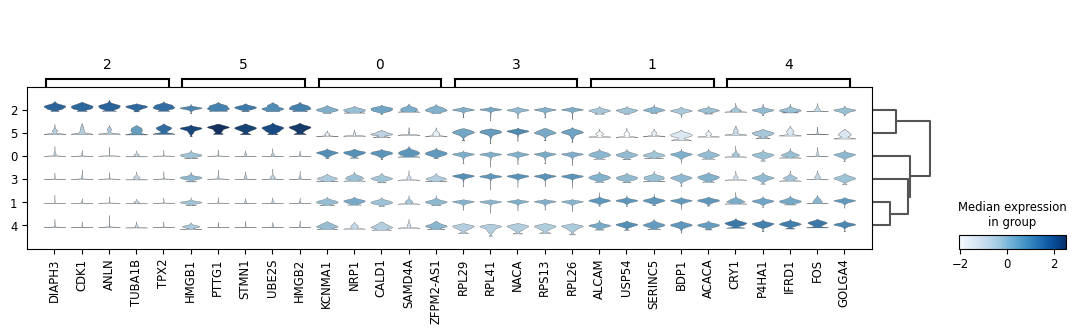

In [37]:
sc.pl.rank_genes_groups_stacked_violin(clusters, n_genes=5, key="t-test_ov", groupby="louvain", save="control.png")

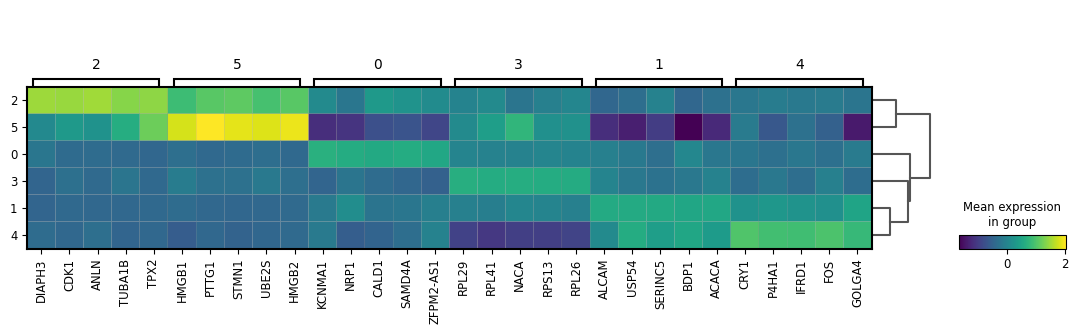

In [38]:
sc.pl.rank_genes_groups_matrixplot(clusters, n_genes=5, key="t-test_ov", groupby="louvain", save="control.png")

In [39]:
cluster_marker_table.index

RangeIndex(start=0, stop=300, step=1)

In [51]:
# Join two datasets

cluster_joined = pd.merge(cluster_marker_table, markers_cluster.var, left_on='genes', right_index=True)
genotype_joined = pd.merge(genotype_marker_table, markers_genotype.var, left_on='genes', right_index=True)

display(cluster_joined.head(5))
display(genotype_joined.head(5))

cluster  rank   ref   genes     scores  logfoldchanges          pvals  \
0       0     0  rest  KCNMA1  30.460016             NaN  5.452858e-182   
1       1     0  rest   ALCAM  26.342333             NaN  1.130034e-139   
2       2     0  rest  DIAPH3  56.114864             NaN   0.000000e+00   
3       3     0  rest   RPL29  21.706341             NaN   3.585623e-95   
4       4     0  rest    CRY1  19.467237             NaN   2.140299e-74   

       pvals_adj         gene_ids    feature_types  ...  log1p_total_counts  \
0  1.407874e-177  ENSG00000156113  Gene Expression  ...           11.293338   
1  2.917635e-135  ENSG00000170017  Gene Expression  ...           11.313303   
2   0.000000e+00  ENSG00000139734  Gene Expression  ...            9.443910   
3   9.257720e-91  ENSG00000162244  Gene Expression  ...           12.633169   
4   2.763019e-70  ENSG00000008405  Gene Expression  ...           10.018734   

   n_counts  n_cells   mito  highly_variable     means  dispersions  \
0   80284.0     6269  False             True  2.080335     2.297037   
1   81903.0     6610  False             True  1.901070     1.857127   
2   12630.0     2390  False             True  0.672460     1.603442   
3  306559.0     7177  False            False  3.057993     1.915380   
4   22442.0     4350  False             True  0.974165     1.564404   

   dispersions_norm      mean       std  
0          1.999682  1.610836  1.001246  
1          1.957665  1.585610  0.827669  
2          3.856492  0.380939  0.647806  
3         -0.075138  2.855077  0.755711  
4          2.296038  0.668411  0.713205  

[5 rows x 25 columns]

cluster  rank   ref       genes  scores  logfoldchanges  pvals  pvals_adj  \
0  control     0  rest  AC007325.4     0.0             NaN    1.0        1.0   
1  control     1  rest  AL157371.2     0.0             NaN    1.0        1.0   
2  control     2  rest        XPO5     0.0             NaN    1.0        1.0   
3  control     3  rest        POLH     0.0             NaN    1.0        1.0   
4  control     4  rest    POLH-AS1     0.0             NaN    1.0        1.0   

          gene_ids    feature_types  ...  log1p_total_counts  n_counts  \
0  ENSG00000278817  Gene Expression  ...            5.375278     215.0   
1  ENSG00000283573  Gene Expression  ...            5.446737     231.0   
2  ENSG00000124571  Gene Expression  ...            8.811950    6713.0   
3  ENSG00000170734  Gene Expression  ...            9.483721   13143.0   
4  ENSG00000203362  Gene Expression  ...            6.556778     703.0   

   n_cells   mito  highly_variable     means  dispersions  dispersions_norm  \
0       89  False            False  0.010128     0.094514         -0.504993   
1      120  False            False  0.016827     0.452598          0.336911   
2     2614  False            False  0.369150     0.471186          0.146129   
3     4124  False             True  0.710227     0.738466          0.639234   
4      493  False            False  0.059496     0.237286         -0.169316   

       mean       std  
0  0.007024  0.068728  
1  0.010775  0.092460  
2  0.266319  0.410755  
3  0.532060  0.563760  
4  0.040925  0.167400  

[5 rows x 25 columns]

In [41]:
# Cut columns from tables

cluster_markers_named = cluster_joined[['cluster', 'ref', 'rank', 'genes', 'scores', 'logfoldchanges', 'pvals', 'pvals_adj']]
genotype_markers_named = genotype_joined[['cluster', 'ref', 'rank', 'genes', 'scores', 'logfoldchanges', 'pvals', 'pvals_adj']]

display(cluster_markers_named.head(5))
display(genotype_markers_named.head(5))

cluster   ref  rank   genes     scores  logfoldchanges          pvals  \
0       0  rest     0  KCNMA1  30.460016             NaN  5.452858e-182   
1       1  rest     0   ALCAM  26.342333             NaN  1.130034e-139   
2       2  rest     0  DIAPH3  56.114864             NaN   0.000000e+00   
3       3  rest     0   RPL29  21.706341             NaN   3.585623e-95   
4       4  rest     0    CRY1  19.467237             NaN   2.140299e-74   

       pvals_adj  
0  1.407874e-177  
1  2.917635e-135  
2   0.000000e+00  
3   9.257720e-91  
4   2.763019e-70

cluster   ref  rank       genes  scores  logfoldchanges  pvals  pvals_adj
0  control  rest     0  AC007325.4     0.0             NaN    1.0        1.0
1  control  rest     1  AL157371.2     0.0             NaN    1.0        1.0
2  control  rest     2        XPO5     0.0             NaN    1.0        1.0
3  control  rest     3        POLH     0.0             NaN    1.0        1.0
4  control  rest     4    POLH-AS1     0.0             NaN    1.0        1.0

In [42]:
sorted_markers = cluster_markers_named.sort_values(by='scores', ascending=False)

In [43]:
sorted_markers.head(100)

cluster   ref  rank   genes     scores  logfoldchanges         pvals  \
2         2  rest     0  DIAPH3  56.114864             NaN  0.000000e+00   
8         2  rest     1    CDK1  54.274582             NaN  0.000000e+00   
14        2  rest     2    ANLN  53.661030             NaN  0.000000e+00   
20        2  rest     3  TUBA1B  53.552227             NaN  0.000000e+00   
26        2  rest     4    TPX2  51.144157             NaN  0.000000e+00   
..      ...   ...   ...     ...        ...             ...           ...   
45        3  rest     7   RPL36  20.106663             NaN  9.112329e-83   
78        0  rest    13   FGF13  20.012615             NaN  1.511699e-84   
84        0  rest    14    MAP4  19.996487             NaN  1.611891e-84   
115       1  rest    19  CAB39L  19.943867             NaN  5.520887e-84   
51        3  rest     8   RPL10  19.897587             NaN  3.721211e-81   

        pvals_adj  
2    0.000000e+00  
8    0.000000e+00  
14   0.000000e+00  
20   0.000000e+00  
26   0.000000e+00  
..            ...  
45   2.940890e-79  
78   2.054240e-81  
84   2.080871e-81  
115  5.090849e-81  
51   1.067533e-77  

[100 rows x 8 columns]

In [44]:
top_markers = sorted_markers.head(100).genes.tolist()

In [45]:
marker_table = pd.DataFrame([top_markers[i:i + 5] for i in range(0, len(top_markers), 5)])
marker_table.to_excel('output.xlsx', header=False, index=False)

# Plot Embeddings

In [46]:
sc.set_figure_params(figsize=(5,5), dpi=200, dpi_save=200)

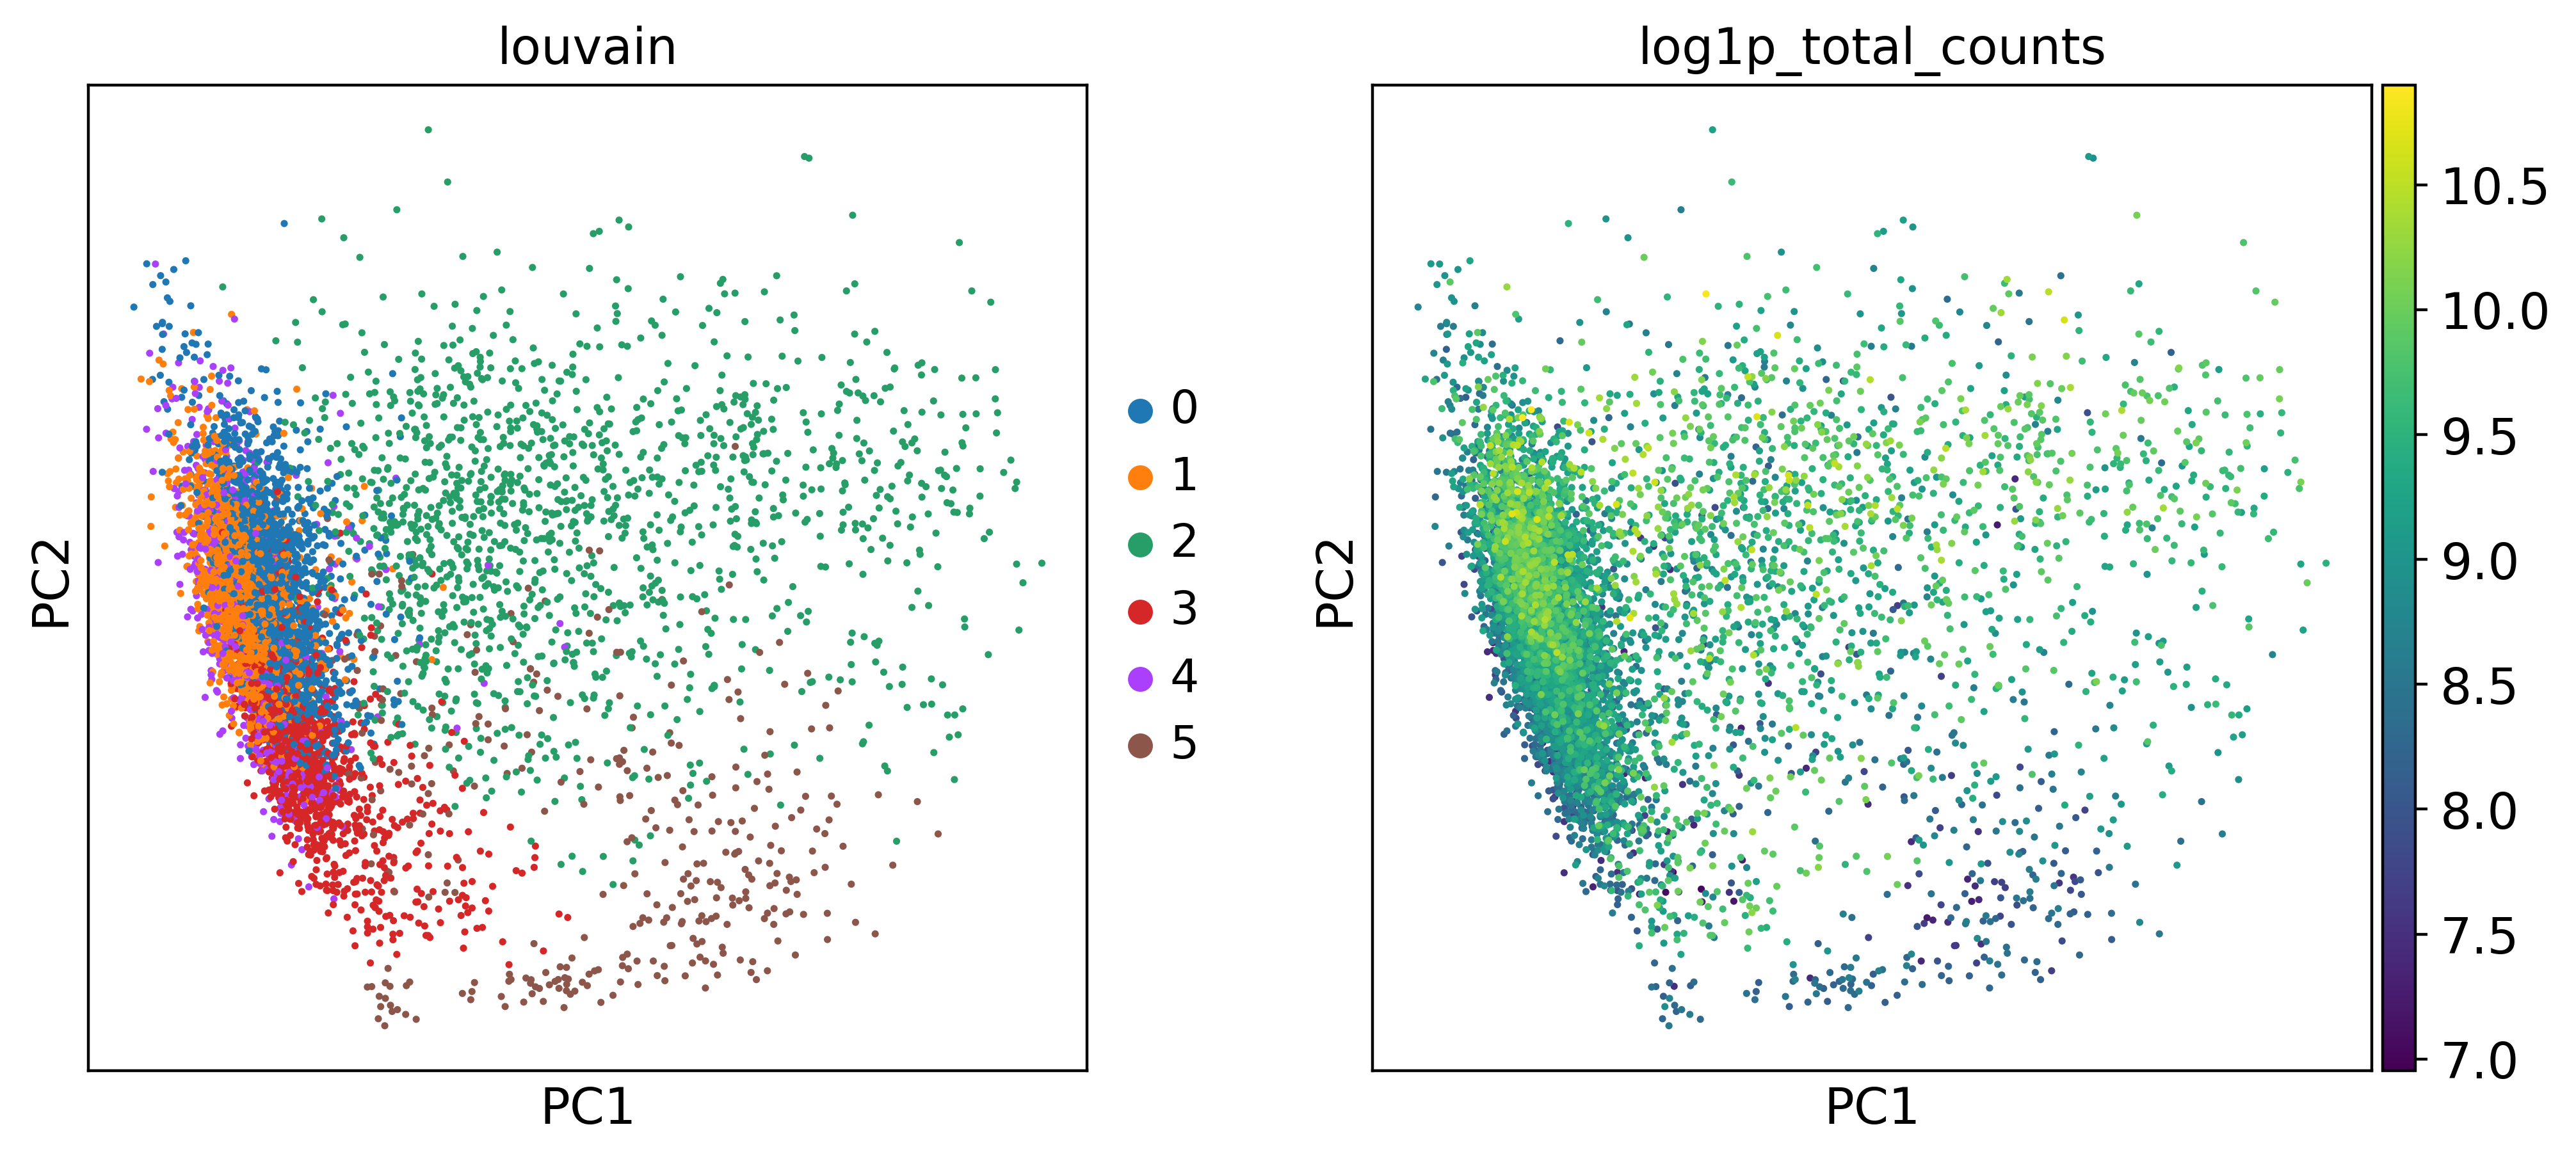

In [47]:
# PCA
sc.pl.embedding(
    markers_cluster,
    basis='pca',  
    color=['louvain','log1p_total_counts'],
    use_raw=False,
    save='.png'
)

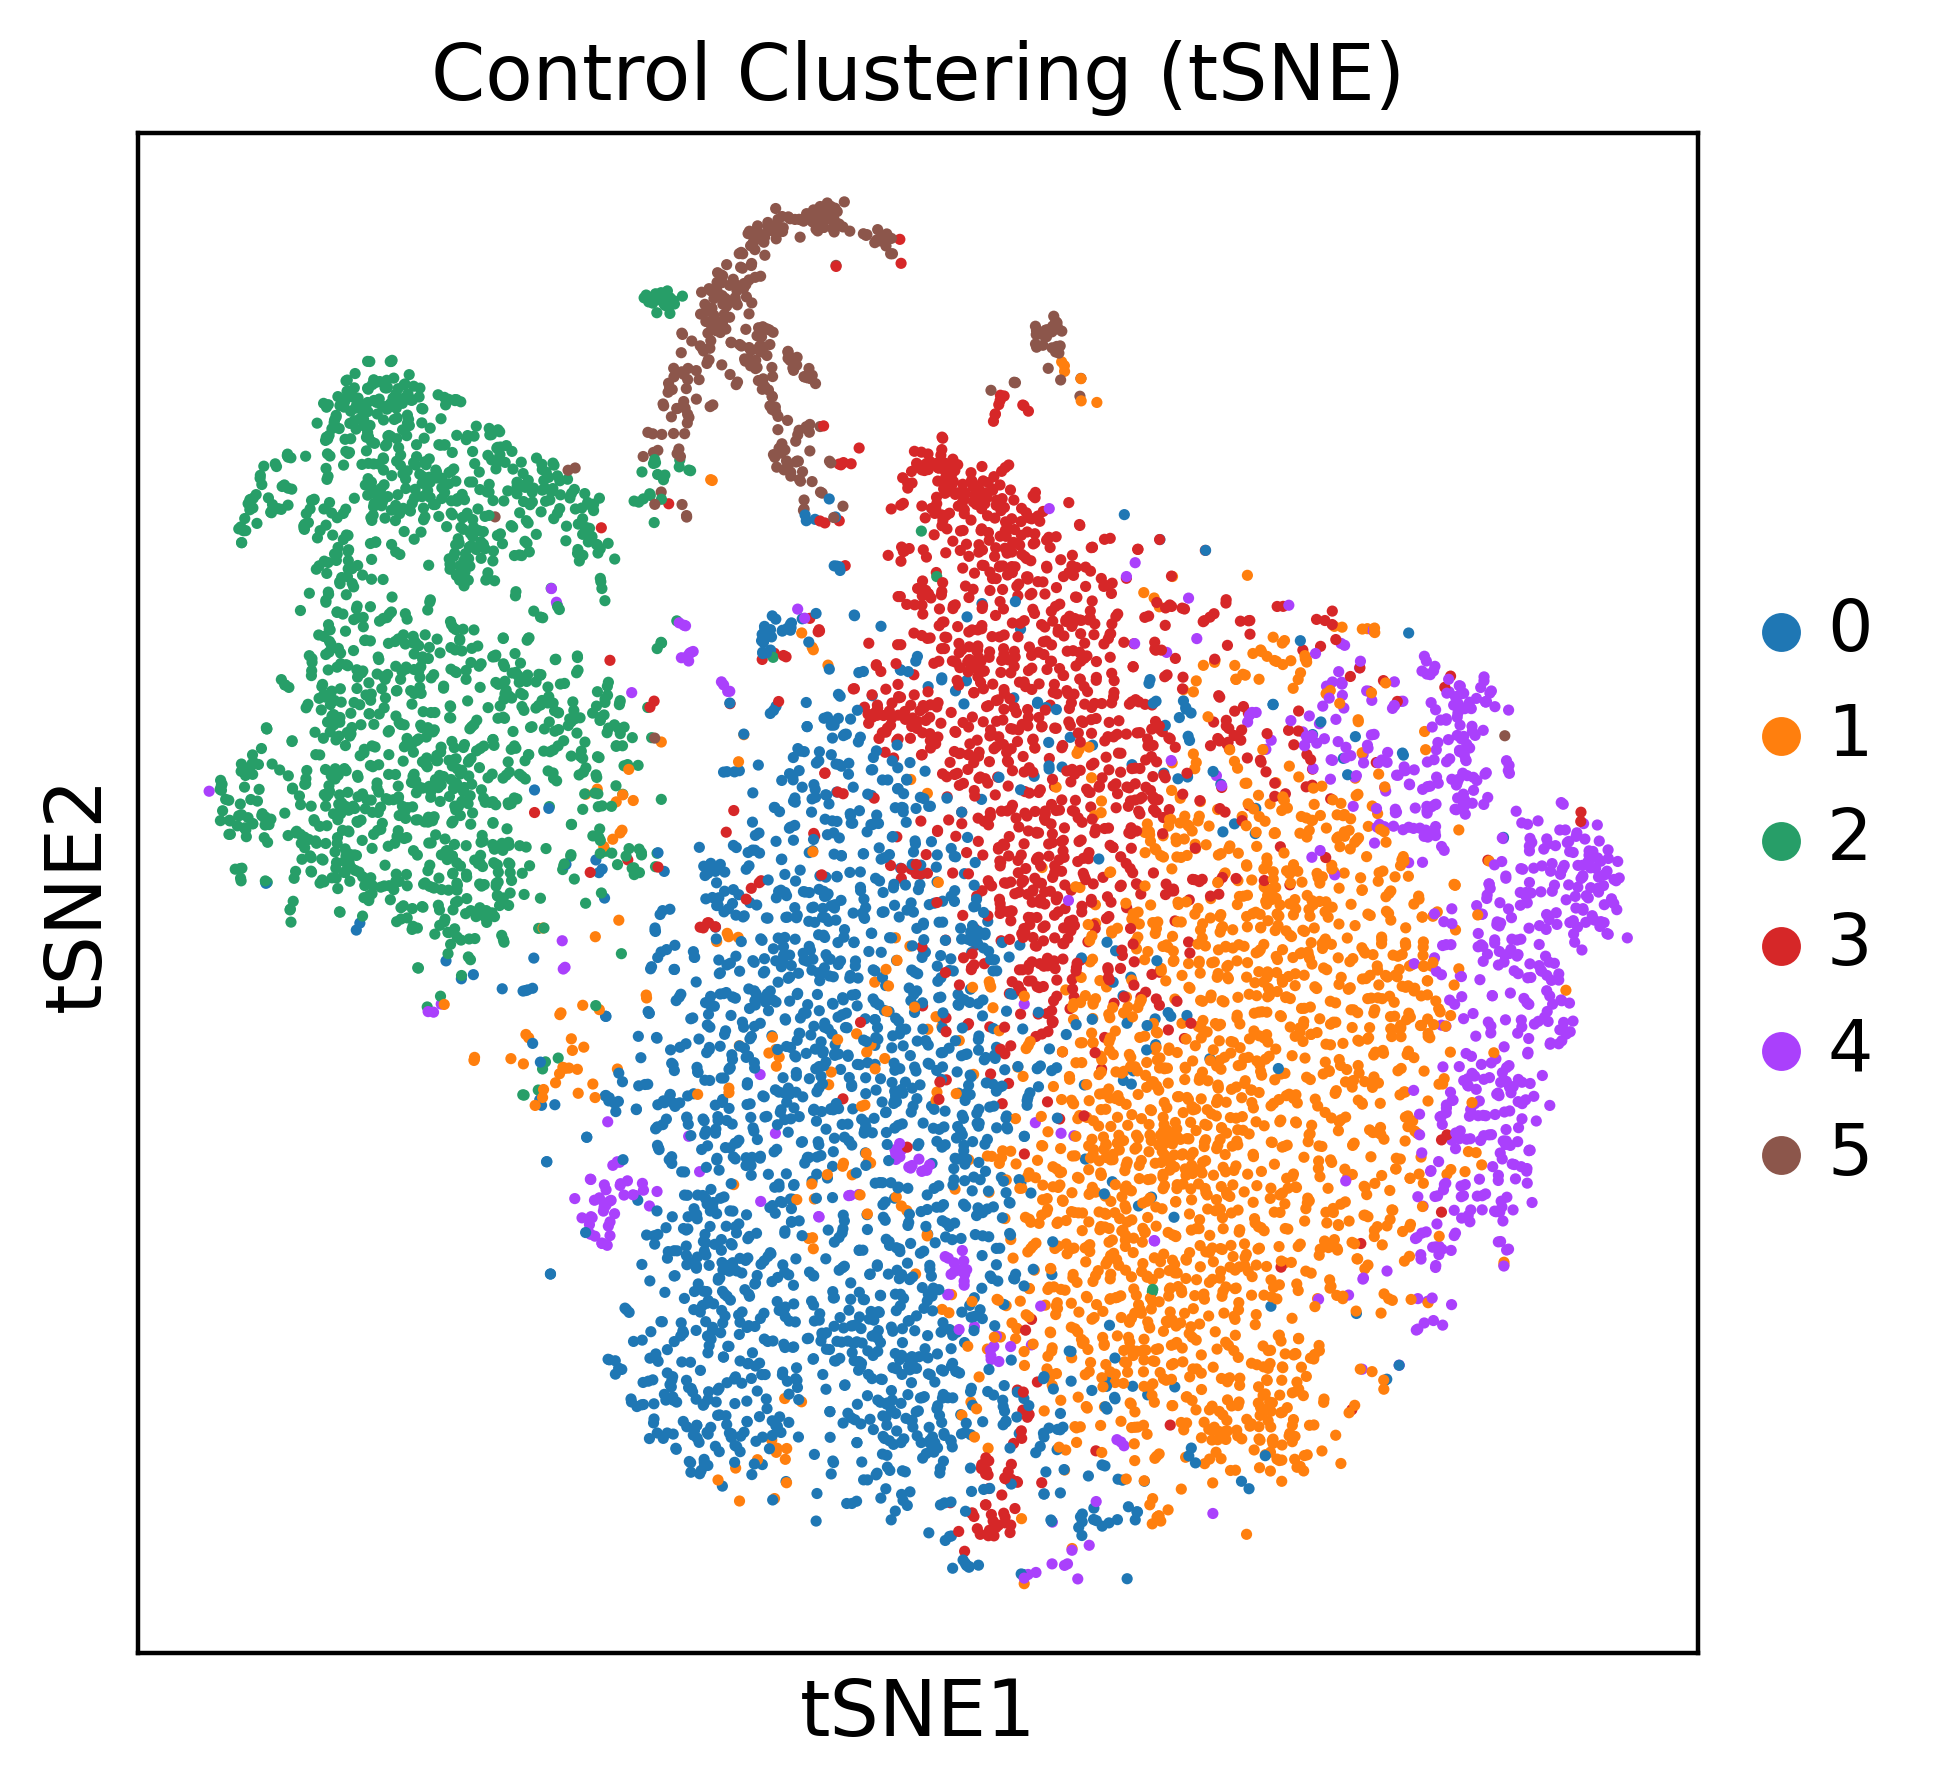

In [48]:
# TSNE
sc.pl.embedding(
    markers_cluster,
    title='Control Clustering (tSNE)',
    basis='tsne',  
    color=['louvain'],
    use_raw=False,
    save='.png'
)

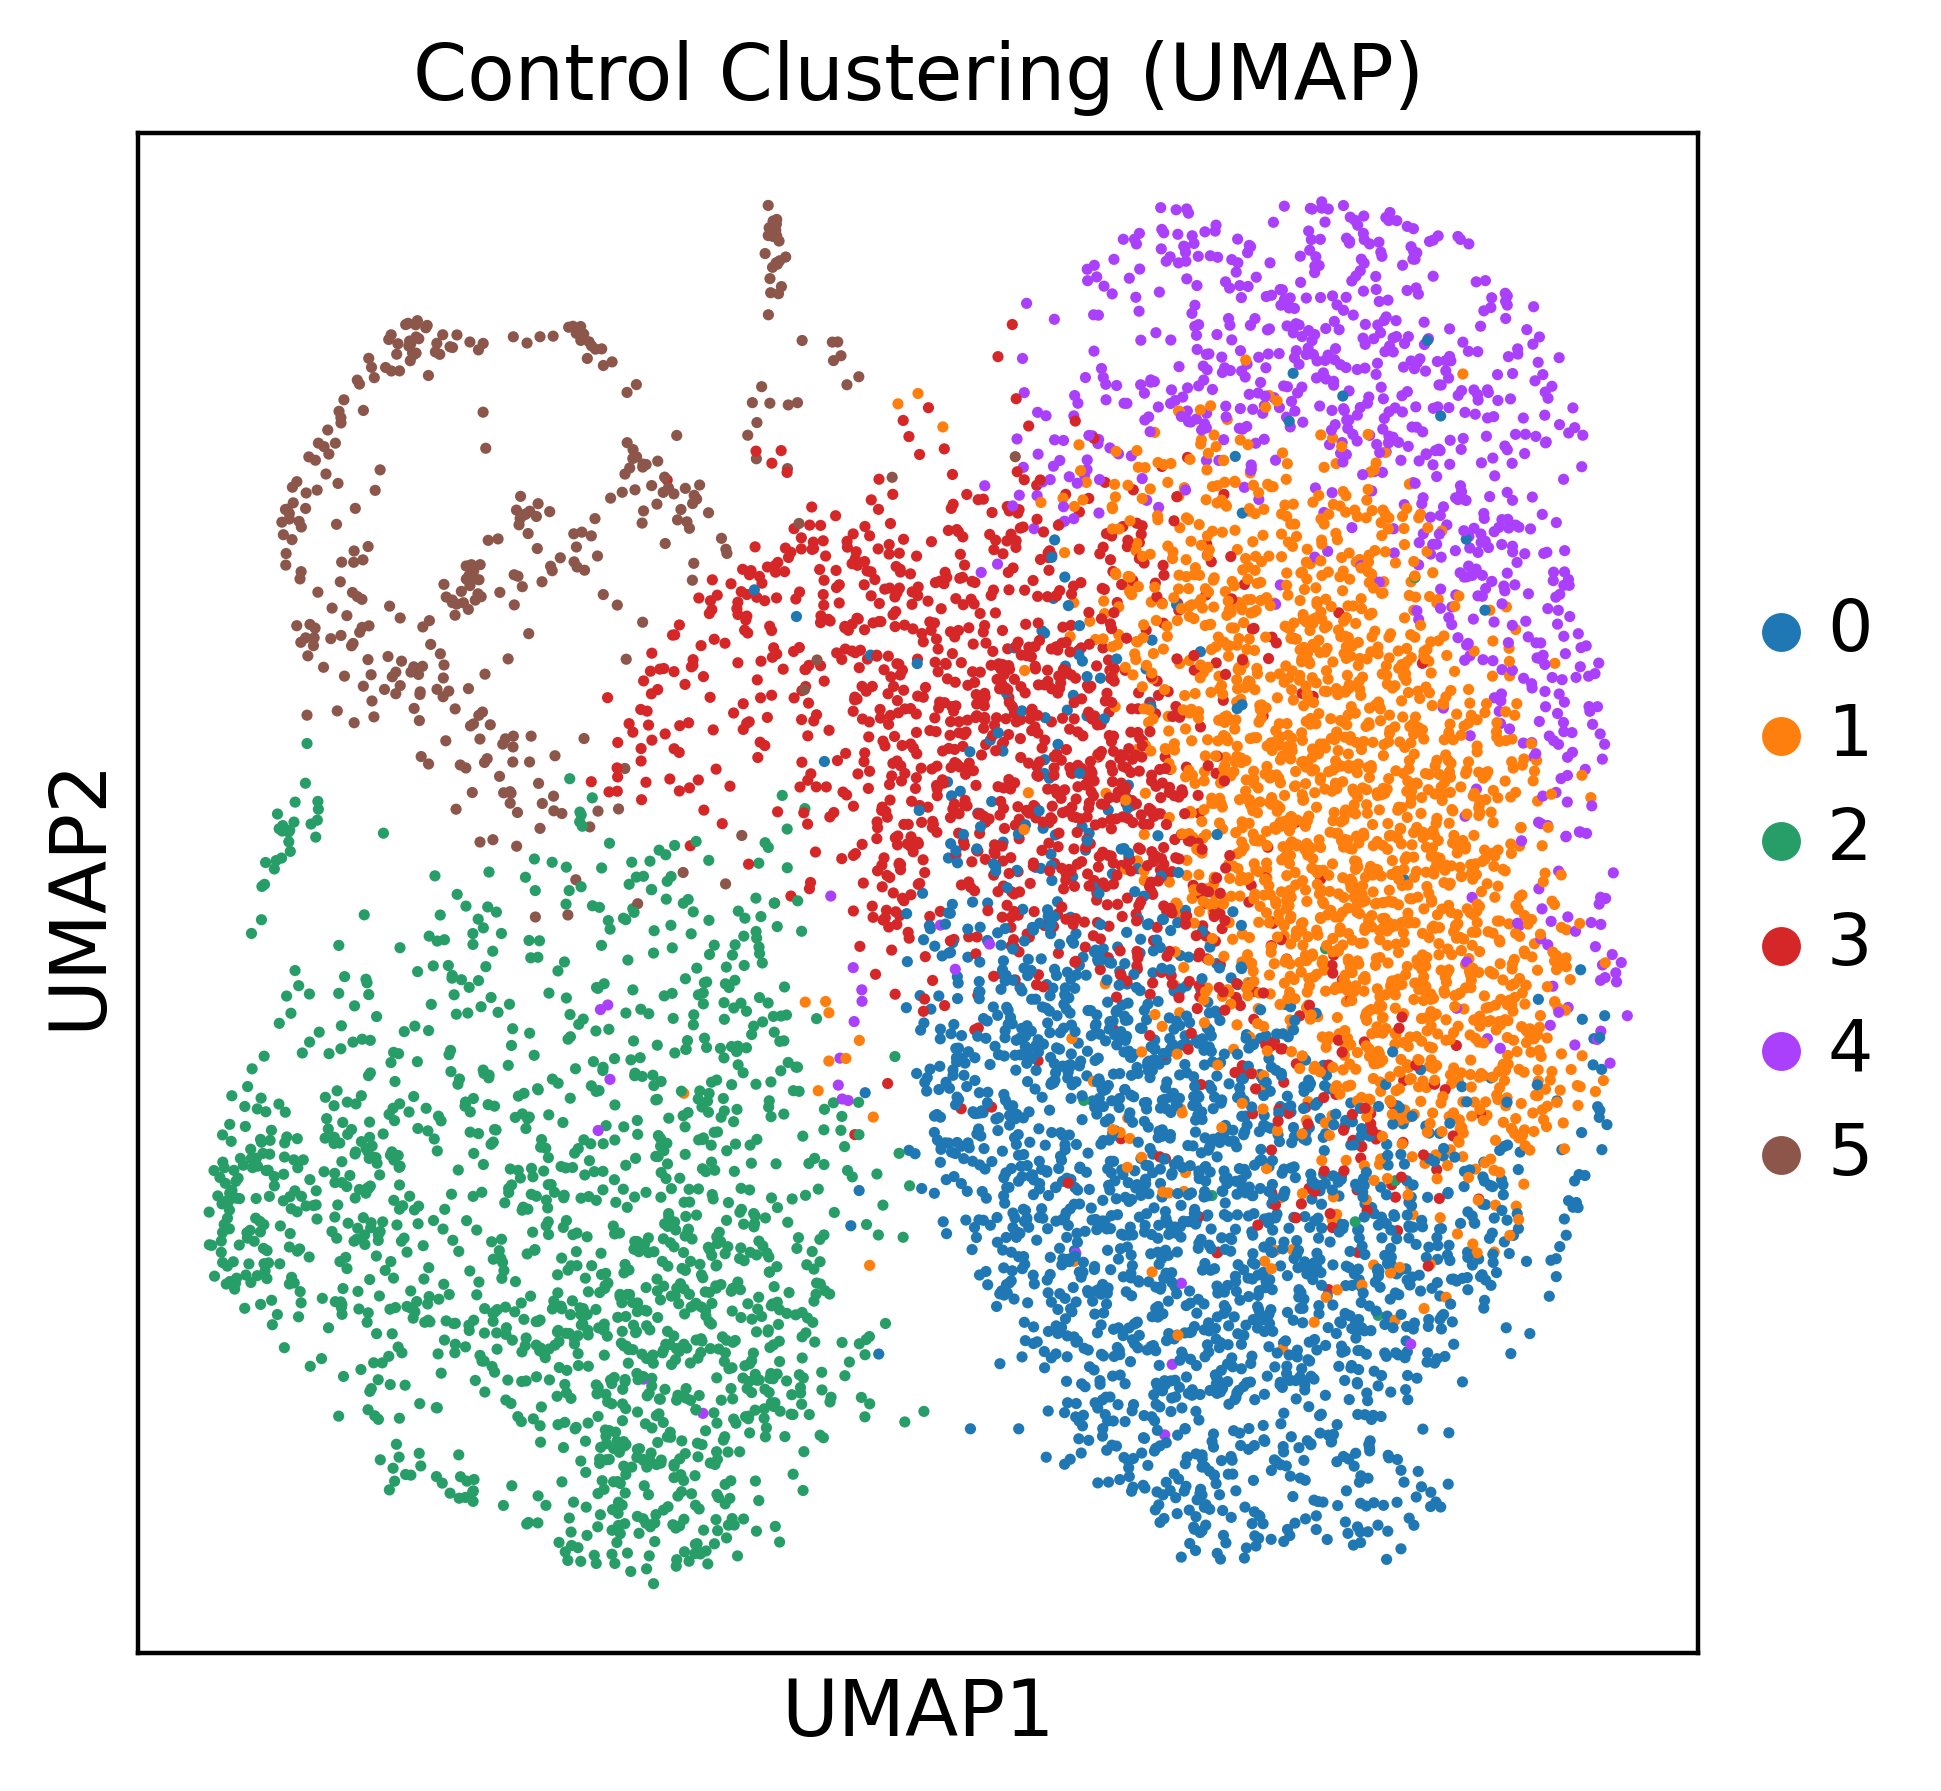

In [49]:
# UMAP
sc.pl.embedding(
    markers_cluster,
    title='Control Clustering (UMAP)',
    basis='umap',  
    color=['louvain'],
    use_raw=False,
    save='.png'
)

In [50]:
#markers_cluster.write_h5ad('anndata-objects/control.h5ad')